Missing values:
 Date      0
Open      0
High      0
Low       0
Close     0
Volume    0
dtype: int64


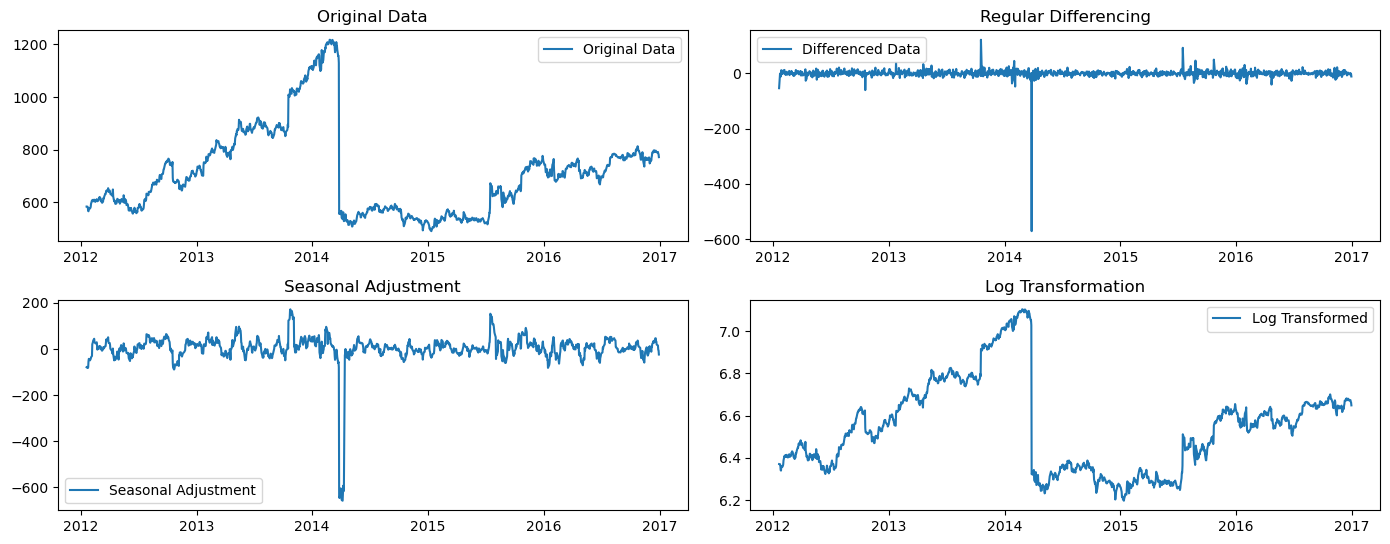

REGULAR DIFFERENCING:
 Date
2012-01-20   -53.43
2012-01-23    -0.47
2012-01-24    -4.58
2012-01-25   -11.41
2012-01-26    -1.39
Name: Differenced, dtype: float64
SEASONAL ADJUSTMENT:
 Date
2012-01-20   -79.20
2012-01-23   -82.53
2012-01-24   -77.87
2012-01-25   -80.31
2012-01-26   -54.22
Name: Seasonal_Differenced, dtype: float64
LOG TRANSFORMATION:
 Date
2012-01-20    6.370569
2012-01-23    6.369764
2012-01-24    6.361890
2012-01-25    6.341998
2012-01-26    6.339548
Name: Log_Transformed, dtype: float64


In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Step 2: Read the data
data = pd.read_csv('Google_Stock_Price_Train.csv')

# Step 3: Data Preprocessing
# Checking for missing values
print("Missing values:\n", data.isnull().sum())

# Select the relevant columns
data = data[['Date', 'Close']]  # Select only the Date and Close columns
data.rename(columns={'Close': 'StockPrice'}, inplace=True)

# Convert 'StockPrice' to numeric, handling any non-numeric entries
data['StockPrice'] = pd.to_numeric(data['StockPrice'].str.replace(',', ''), errors='coerce')

# Convert Date to datetime format
data['Date'] = pd.to_datetime(data['Date'])

# Set Date as index
data.set_index('Date', inplace=True)

# Step 4: Regular Differencing
data['Differenced'] = data['StockPrice'].diff()

# Step 5: Seasonal Adjustment (assuming monthly seasonality for illustration)
data['Seasonal_Differenced'] = data['StockPrice'].diff(12)

# Step 6: Log Transformation
data['Log_Transformed'] = np.log(data['StockPrice'])

# Drop rows with NaN values generated by differencing or log transformation
data.dropna(inplace=True)

# Plotting the data
plt.figure(figsize=(14, 8))

plt.subplot(3, 2, 1)
plt.plot(data['StockPrice'], label='Original Data')
plt.title('Original Data')
plt.legend()

plt.subplot(3, 2, 2)
plt.plot(data['Differenced'], label='Differenced Data')
plt.title('Regular Differencing')
plt.legend()

plt.subplot(3, 2, 3)
plt.plot(data['Seasonal_Differenced'], label='Seasonal Adjustment')
plt.title('Seasonal Adjustment')
plt.legend()

plt.subplot(3, 2, 4)
plt.plot(data['Log_Transformed'], label='Log Transformed')
plt.title('Log Transformation')
plt.legend()

plt.tight_layout()
plt.show()

# Step 8: Display results
print("REGULAR DIFFERENCING:\n", data['Differenced'].head())
print("SEASONAL ADJUSTMENT:\n", data['Seasonal_Differenced'].head())
print("LOG TRANSFORMATION:\n", data['Log_Transformed'].head())
